In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv('../data/age_and_gender.csv')
df.head()

,Year,Reporting Period,Age,Gender,Number of Applicants,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,2016,2016 Q1,0 to 17,Male,175678,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,2016 Q1,0 to 17,Female,168685,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,2016 Q1,18 to 25,Male,90491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,2016 Q1,18 to 25,Female,105410,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,2016 Q1,26 to 34,Male,105589,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df.drop(df.iloc[:, [5,6,7,8,9,10,11]], axis=1)
df.head()

,Year,Reporting Period,Age,Gender,Number of Applicants
0,2016,2016 Q1,0 to 17,Male,175678
1,2016,2016 Q1,0 to 17,Female,168685
2,2016,2016 Q1,18 to 25,Male,90491
3,2016,2016 Q1,18 to 25,Female,105410
4,2016,2016 Q1,26 to 34,Male,105589


In [44]:
df2018 = df.loc[df['Year'] == 2018]
age_df = df2018.groupby('Age', as_index=False).sum().drop('Year', axis=1)
gender_df = df2018.groupby('Gender', as_index=False).sum().drop('Year', axis=1)

In [45]:
age_df

,Age,Number of Applicants
0,0 to 17,420076
1,18 to 25,356152
2,26 to 34,387430
3,35 to 44,240867
4,45 to 54,209587
5,55 to 64,200590
6,65+,109951


In [46]:
first = [1291480,
        1277431,
        1321790,
        845557,
        1234971,
        1224444,
        1262580,
        805456]
    
second = [536382,
        268634,
        263995,
        803280,
        498956,
        254942,
        253699,
        769160]
    
third = [1352309,
        1256087,
        1323647,
        1259717]
    
fourth = [1248368,
        1269888,
        1273426,
        1286212]
    
fifth = [1298720,
        1230780,
        1337328,
        1285792]
    
sixth = [1044845,
        370216,
        492422,
        1125562,
        405011,
        540533]
    
last = [263810,
        336764,
        436283,
        329990,
        237330,
        197602,
        297860,
        389007,
        521147,
        420050,
        342374,
        348303]

In [47]:
age_groups = [sum(i) for i in [first, second, third, fourth, fifth, sixth, last]]
age_groups

[9263709, 3649048, 5191760, 5077894, 5152620, 3978589, 4120520]

In [48]:
age_scale = 39557045/sum(age_groups)
age_scaled = [age_scale*i for i in age_groups]

In [49]:
age_df['Population'] = age_scaled
age_df['Percent'] = round(age_df['Number of Applicants']*100/age_df['Population'],2)
age_df

,Age,Number of Applicants,Population,Percent
0,0 to 17,420076,1.005774e+07,4.18
1,18 to 25,356152,3.961821e+06,8.99
2,26 to 34,387430,5.636765e+06,6.87
3,35 to 44,240867,5.513139e+06,4.37
4,45 to 54,209587,5.594270e+06,3.75
5,55 to 64,200590,4.319609e+06,4.64
6,65+,109951,4.473705e+06,2.46


In [50]:
gender_df['Gender'].iloc[0] = 'Female'
gender_df = gender_df.groupby('Gender', as_index=False).sum()
gender_df

C:\Users\kevin\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Gender,Number of Applicants
0,Male,931041
1,Female,993612


In [52]:
gender_df['Population'] = [.497*39557045, .503*39557045]
gender_df['Percent'] = round(gender_df['Number of Applicants']*100/gender_df['Population'],2)
gender_df

,Gender,Number of Applicants,Population,Percent
0,Male,931041,1.965985e+07,4.74
1,Female,993612,1.989719e+07,4.99


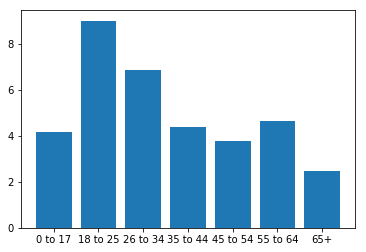

In [53]:
plt.bar(age_df['Age'], age_df['Percent'])
plt.show()

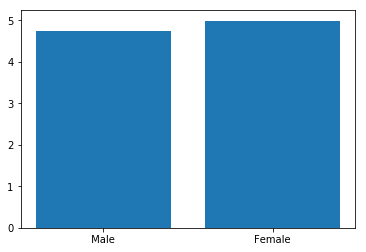

In [54]:
plt.bar(gender_df['Gender'], gender_df['Percent'])
plt.show()

In [55]:
age_df.to_csv('../data/cleaned/age.csv', index=False)
gender_df.to_csv('../data/cleaned/gender.csv', index=False)